# StyleGAN2 Image Generation

### **What is a GAN?**  
A **Generative Adversarial Network (GAN)** consists of two neural networks:  

- **Generator** – Creates images from random noise.  
- **Discriminator** – Evaluates if images are real or AI-generated.  

These networks train in a competitive process, improving the quality of generated images over time.  

### **StyleGAN2: An Improved GAN Architecture**  
**StyleGAN2**, developed by NVIDIA, is an enhanced version of original StyleGAN with:  
✅ **Better image quality** (fewer artifacts, sharper details).  
✅ **Improved latent space** (better control over image generation).  
✅ **Reduced droplet artifacts** found in original StyleGAN.  

However, it still has some limitations:  
❌ **Computationally expensive** – Requires powerful GPUs for training.  
❌ **Bias in datasets** – Generates images based on the biases of the training data.  

### **Datasets Used in Training**  
StyleGAN2 has been trained on datasets like:  
- **FFHQ (Flickr-Faces-HQ)** – High-quality human face dataset.  
- **LSUN (Large-scale Scene Understanding)** – Scenes like churches, bedrooms, and cats.  
- **MetFaces** – A collection of artistic portraits for fine-art generations.

In [ ]:
!pip install torch torchvision numpy pillow matplotlib

In [2]:
# Clone StyleGAN2-ADA repository
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 131 (delta 0), reused 1 (delta 0), pack-reused 128 (from 1)
Receiving objects: 100% (131/131), 1.13 MiB | 16.78 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2-ada-pytorch


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Store downloaded model paths.

In [4]:
model_path_ffhq = "/content/drive/MyDrive/stylegan_models/stylegan2-ffhq-512x512.pkl"
model_path_metfaces = "/content/drive/MyDrive/stylegan_models/stylegan2-metfaces-1024x1024.pkl"

In [5]:
import os
os.listdir('/content/drive/MyDrive/stylegan_models/')

['stylegan2-ffhq-512x512.pkl', 'stylegan2-metfaces-1024x1024.pkl']

In [6]:
!apt-get install ninja-build

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  ninja-build
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 111 kB of archives.
After this operation, 358 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ninja-build amd64 1.10.1-1 [111 kB]
Fetched 111 kB in 1s (101 kB/s)
Selecting previously unselected package ninja-build.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../ninja-build_1.10.1-1_amd64.deb ...
Unpacking ninja-build (1.10.1-1) ...
Setting up ninja-build (1.10.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [7]:
!ninja --version

1.10.1


In [8]:
%cd /content/stylegan2-ada-pytorch

/content/stylegan2-ada-pytorch


## Generating StyleGAN2 Faces with Colab

Experimenting with different seeds and truncation.

In [9]:
!python generate.py --network={model_path_ffhq} --seeds=42 --trunc=0.7 --outdir=/content/output/

Loading networks from "/content/drive/MyDrive/stylegan_models/stylegan2-ffhq-512x512.pkl"...
Generating image for seed 42 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


In [10]:
import torch
torch.cuda.is_available()

True

/content


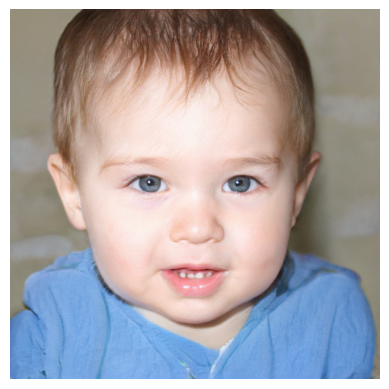

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

%cd /content
# Load and display the generated image
output_image_path = "/content/output/seed0042.png"
output_img = Image.open(output_image_path)

plt.imshow(output_img)
plt.axis('off')
plt.show()

In [12]:
%cd /content/stylegan2-ada-pytorch
!python generate.py --network={model_path_ffhq} --seeds=33 --trunc=0.57 --outdir=/content/output/

/content/stylegan2-ada-pytorch
Loading networks from "/content/drive/MyDrive/stylegan_models/stylegan2-ffhq-512x512.pkl"...
Generating image for seed 33 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


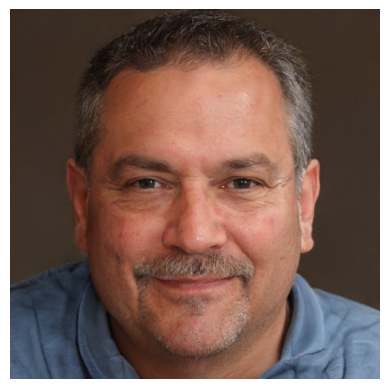

In [ ]:
output_image_path = "/content/output/seed0033.png"
output_img = Image.open(output_image_path)

plt.imshow(output_img)
plt.axis('off')
plt.show()

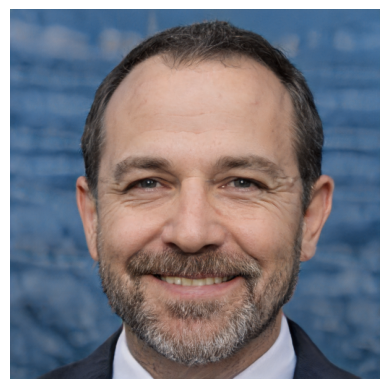

In [ ]:
output_image_path = "/content/generated_styles/seed0101.png"
output_img = Image.open(output_image_path)

plt.imshow(output_img)
plt.axis('off')
plt.show()

Trying out the metfaces model (more cartoon-like).

In [14]:
!python generate.py --network={model_path_metfaces} --seeds=47 --trunc=0.27 --outdir=/content/output/

Loading networks from "/content/drive/MyDrive/stylegan_models/stylegan2-metfaces-1024x1024.pkl"...
Generating image for seed 47 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


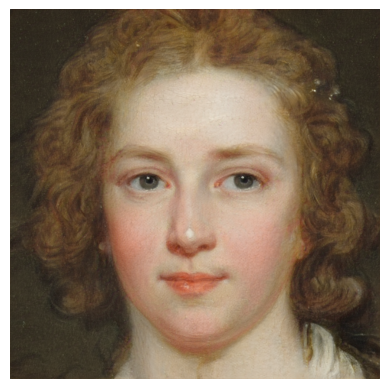

In [ ]:
output_image_path = "/content/output/seed0047.png"
output_img = Image.open(output_image_path)

plt.imshow(output_img)
plt.axis('off')
plt.show()

In [16]:
!python generate.py --network={model_path_metfaces} --seeds=1047 --trunc=0.19 --outdir=/content/output/

Loading networks from "/content/drive/MyDrive/stylegan_models/stylegan2-metfaces-1024x1024.pkl"...
Generating image for seed 1047 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.


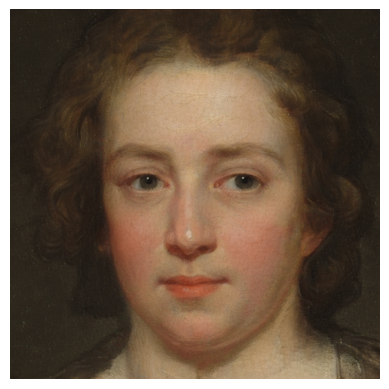

In [ ]:
output_image_path = "/content/output/seed1047.png"
output_img = Image.open(output_image_path)

plt.imshow(output_img)
plt.axis('off')
plt.show()